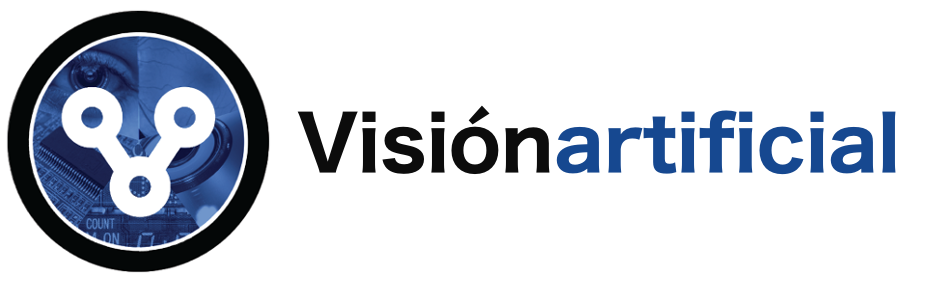

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.
<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

<h1 style="font-size:30px;">Pirámides de Imaxes</h1>

Neste caderno imos abordar o tema das pirámides de imaxes:

* Pirámides gaussianas
* Pirámides de imaxe laplaciana
* Fusión de imaxes mediante a pirámide laplaciana


A miúdo, estas técnicas, empréganse para lograr un procesamento invariante de escala nos seguintes contextos:

* template matching
* rexistro de imaxes
* mellora da imaxe
* detección de puntos de interese e
* detección de obxectos.

TO_DO: POÑER UNHA IMAXE ILUSTRATIVA



# 1. Pirámide Gaussiana

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

A idea básica para construír a pirámide gaussiana dunha imaxe é a seguinte:

  1. Suavizamos a imaxe cunha Gaussina
  2. Reduce as dimensións da imaxe á metade descartando un de cada dous pixels da imaxe
  3. Repitimos este proceso ata acadar os niveis desexados da pirámide ou ata que a imaxe se reduce ao tamaño 1 × 1


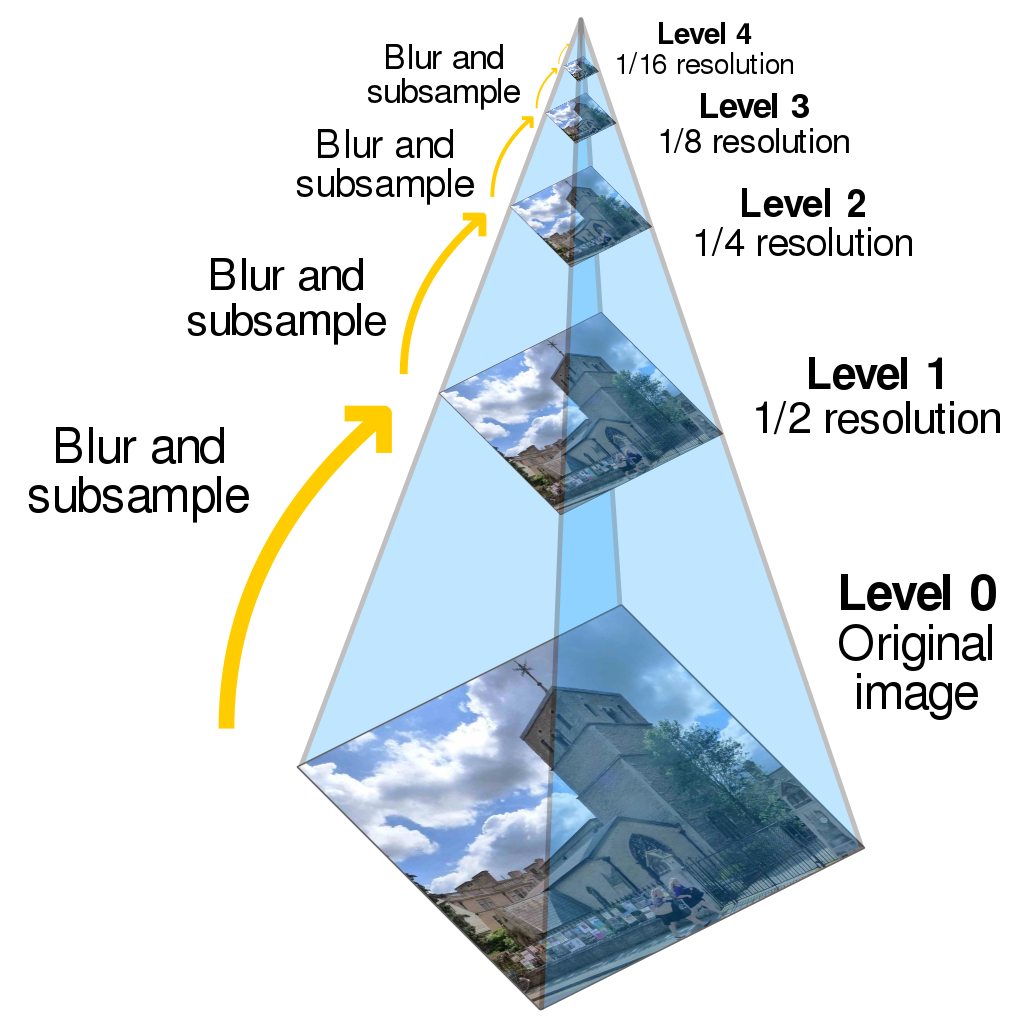

Antes de nada, imos a lembrar como se realiza un suavizado gaussiano dunha imaxe de cor. Para iso, realizaremos o seguinte exercicio:

   1. Cargar a imaxe
   2. Suavizamos cada canle cun kernel gaussiano de 5 x 5
   3. Construír o seguinte nivel da pirámide gaussiana descartando píxels de dous en dous (metade do tamaño orixinal) 

In [17]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

Dimensions de I1 = (512, 512, 3), I2 = (128, 128, 3) e I3 = (32, 32, 3)


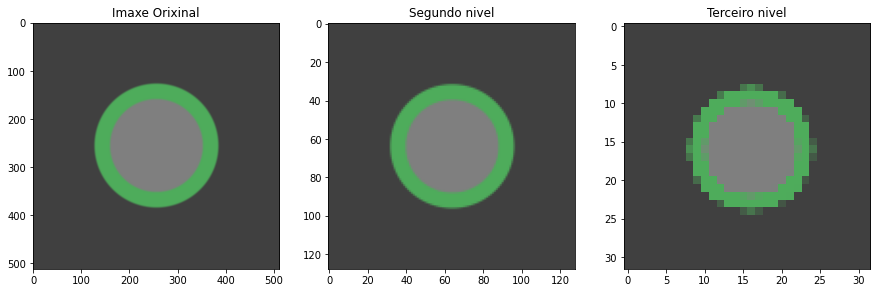

In [18]:
#cargamos a imaxe de entrada e pasamola a RGB e a un tamaño de 512x512
I = cv2.imread("../data/green_circle.png", 1)
if I is None:
    raise Exception("Non atopo a imaxe no sitio indicado")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I = cv2.resize(I, (512, 512))

#Suavizamos cunha gaussina cur kernel de 5x5 e unha sigma de 2
I[:,:,0] = cv2.GaussianBlur(I[:,:,0], (5,5), 2, 2)
I[:,:,1] = cv2.GaussianBlur(I[:,:,1], (5,5), 2, 2)
I[:,:,2] = cv2.GaussianBlur(I[:,:,2], (5,5), 2, 2)

#submostraxe da imaxe en cada paso (piramide) cun intervalo de maostraxe marcado por Int_mostraxe:
#Int_mostraxe = 4
Int_mostraxe = 4
I2 = I[::Int_mostraxe,::Int_mostraxe,:]
I3 = I2[::Int_mostraxe,::Int_mostraxe,:]

print('Dimensions de I1 = {}, I2 = {} e I3 = {}'.format(I.shape, I2.shape, I3.shape))

#Visualizacion
plt.figure(figsize=[15,15])
plt.subplot(231);plt.imshow(I);plt.title("Imaxe Orixinal");
plt.subplot(232);plt.imshow(I2);plt.title("Segundo nivel");
plt.subplot(233);plt.imshow(I3);plt.title("Terceiro nivel");


Podemos ver que a saída nos distintos  


# <font style = "color: rgb (50,120,229)"> 2.Implementación (pirámide gaussiana)  </font>

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

O método OpenCV pyrDown realiza os pasos 1 e 2 anteriores. Emprega o seguinte núcleo para difuminar a imaxe (no paso 1).

OLLO sen facer de aqui para abaixo
As imaxes binarias úsanse intensivamente en aplicacións de visión artificial, xa que permiten procesar selectivamente rexións específicas dunha imaxe, mantendo intactas as outras rexións. O limiar de imaxes emprégase para crear imaxes binarias a partir de imaxes en escala de grises. Podes usar limiares diferentes para crear imaxes binarias diferentes a partir da orixinal coa función **`pyrDown ()`**.

### <font color = "green"> Sintaxe da función </font>


``` python
retval, dst = cv2.pyrDown(src, thresh, maxval, type[, dst])
```

`dst`: a matriz de saída do mesmo tamaño, tipo e número de canles que `src`.

A función ten **4 argumentos necesarios**:

1. `src`: matriz de entrada (punto flotante de varias canles, 8 ou 32 bits).
2. `thresh`: valor limiar.
3. `maxval`: valor máximo para usar cos tipos de limiar THRESH_BINARY e THRESH_BINARY_INV.
4. `type`: tipo de limiar (ver ThresholdTypes).



### <font style="color:rgb(8,133,37)">Documentación de OpenCV</font>

[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

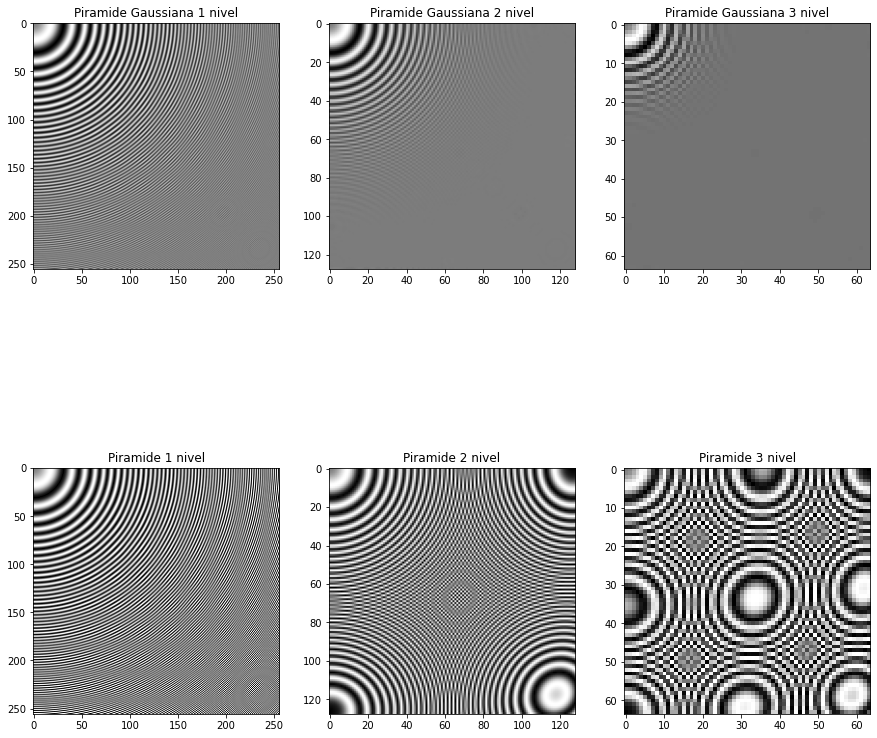

In [19]:

#Funcion que implementa a piramide gaussiana 
def gen_gaussian_pyramid(I, levels=6):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv2.pyrDown(G)
        gpI.append(G)
    return gpI

#xeramos unha priramide sen suavizado (submostraxe)
def gen_pyramid(I, levels=6):
    G = I.copy()
    pI = [G]
    for i in range(levels):
        G = G[::2,::2]
        pI.append(G)
    return pI
    
#cargamos a imaxe de interese
I = cv2.imread("../data/zone.png", 0)
if I is None:
    raise Exception("Non atopo a imaxe no sitio indicado")
    
#chamamos as dúas priramides
foo = gen_gaussian_pyramid(I, levels=5)
boo = gen_pyramid(I, levels=5)
    

#Visualizacion
plt.figure(figsize=[15,15])
plt.subplot(231);plt.imshow(foo[1]);plt.title("Piramide Gaussiana 1 nivel");
plt.subplot(232);plt.imshow(foo[2]);plt.title("Piramide Gaussiana 2 nivel");
plt.subplot(233);plt.imshow(foo[3]);plt.title("Piramide Gaussiana 3 nivel");
plt.subplot(234);plt.imshow(boo[1]);plt.title("Piramide 1 nivel");
plt.subplot(235);plt.imshow(boo[2]);plt.title("Piramide 2 nivel");
plt.subplot(236);plt.imshow(boo[3]);plt.title("Piramide 3 nivel");

O método OpenCV **`pyrDown`** realiza os dous pasos anteriores. Esta función emprega o seguinte kernel para suavizar a imaxe:

$$ 
  \frac{1}{1256}\cdot
  \begin{bmatrix}
    1 & 4 & 6 & 4 & 1\\
    4 & 16 & 24 & 16 & 4\\
    6 & 24 & 36 & 24 & 6\\
    4 & 16 & 24 & 16 & 4\\
    1 & 4 & 6 & 4 & 1
  \end{bmatrix}
$$



Nievel=0: tamanho=650x600
Nievel=1: tamanho=325x300
Nievel=2: tamanho=163x150
Nievel=3: tamanho=82x75
Nievel=4: tamanho=41x38


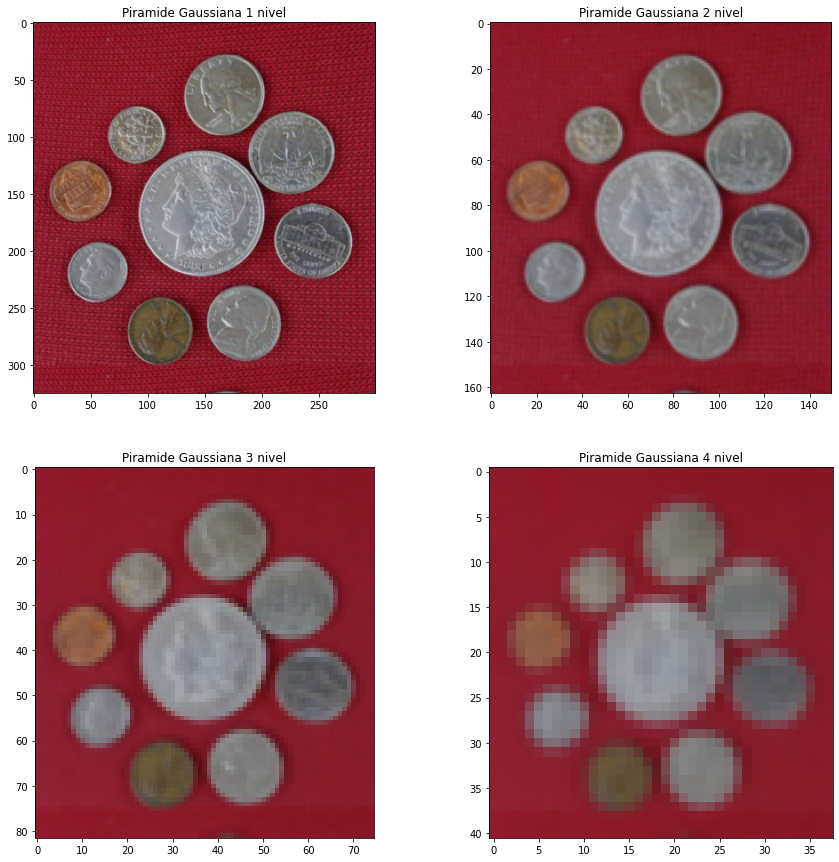

In [32]:
A = cv2.imread('../data/CoinsA.png')
if A is None:
    raise Exception("Non atopo a imaxe no sitio indicado")

A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

#Xeramos a piramide gaussiana
gpA = gen_gaussian_pyramid(A,levels=4)

#Imprimimos as dimensions da piramide en cada nivel
num_levels = len(gpA)
for i in range(num_levels):
    rows = gpA[i].shape[0]
    cols = gpA[i].shape[1]
    print('Nievel={}: tamanho={}x{}'.format(i, rows, cols))


#Visualizacion
plt.figure(figsize=[15,15])
plt.subplot(221);plt.imshow(gpA[1]);plt.title("Piramide Gaussiana 1 nivel");
plt.subplot(222);plt.imshow(gpA[2]);plt.title("Piramide Gaussiana 2 nivel");
plt.subplot(223);plt.imshow(gpA[3]);plt.title("Piramide Gaussiana 3 nivel");
plt.subplot(224);plt.imshow(gpA[4]);plt.title("Piramide Gaussiana 4 nivel");

# 2. Pirámide Laplaciana da Gaussiana

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

Proposta por [**`Burt e Adelson`**](http://persci.mit.edu/pub_pdfs/spline83.pdf) é unha descomposición da imaxe en filtros paso-banda obtida a partir da pirámide de Gaussina (a Laplaciana é aproximadamente igual a diferencia de gausssianas con escalas apropiadas). Cada nivel codifica información dunha banda frecuencial espacial particular. Os pasos básicos para construír estas pirámides son:

1. Convolucionamos a imaxe orinal, $g_0$, cun filtro paso baixo $w$ (por exemplo, o filtro gaussiano) e submostréamolo por dous para crear unha versión paso baixo reducida da imaxe $g_1$. Lembra que esta laboura a fai a función de OpenCV **`pyrDown()`**.

2. Sobremostrea $g_1$ insertando ceros entre cada fila e columna e logo interpola os valores que faltan convolucionando co mesmo filtro $w$ para crear a imaxe paso-baixa expandida $g_1^′$ que se resta pixel a pixel da orixinal para dar como resultado unha imaxe de detalle $L_0$. Concretamente $L_0 = g_0 − g_1^′$.

3. Repetimos os pasos 1 e 2 para todos os niveis que desexemos da pirámide.

O operador Laplaciana da Gaussiana (LoG) está definido como:

$${\displaystyle \vec{\nabla}^2 f(\vec{p})=\frac {\partial^2 f}{\partial x_{1}^2}}(\vec{p})+\ldots+ \frac {\partial^2 f}{\partial x_{n}^2}(\vec{p})$$
        
        
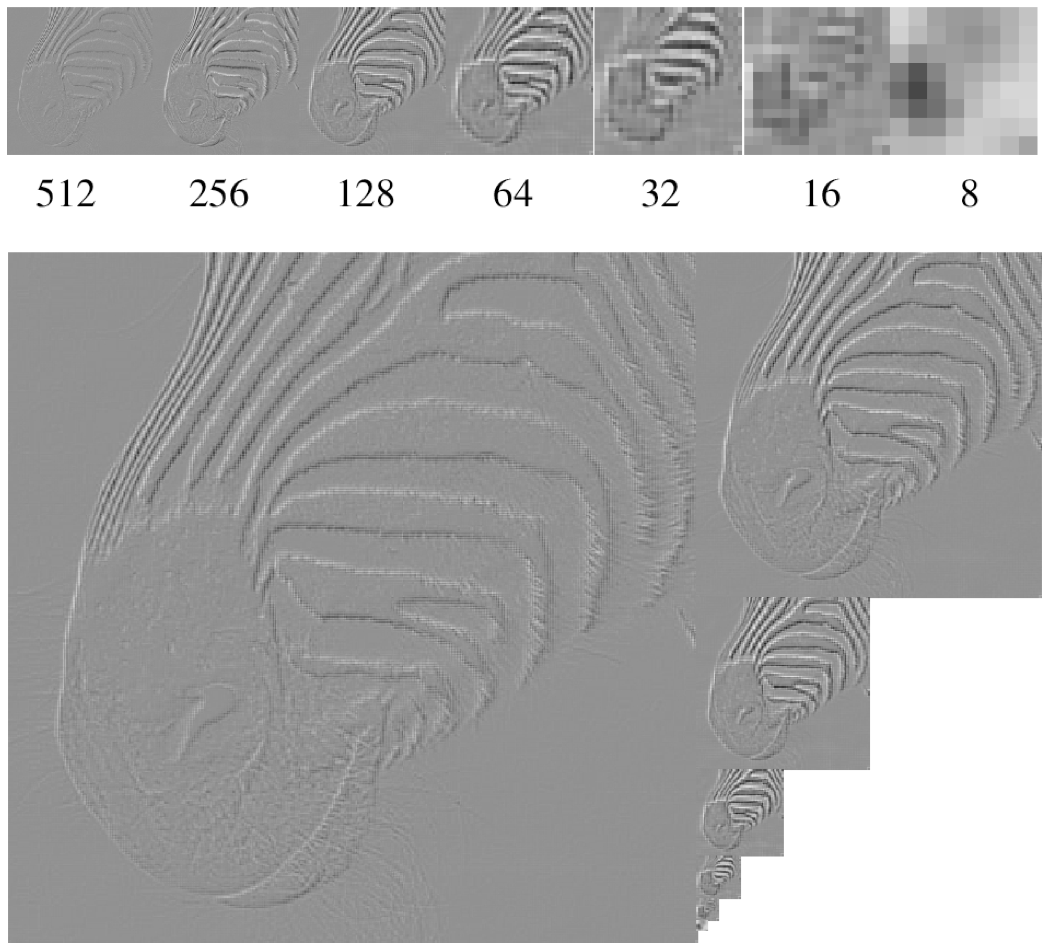



O LoG pode ser aproximado pola diferenza de gaussianas:

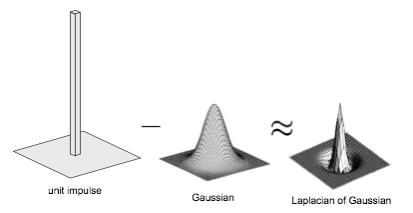

Imos a empregar esta propiedade ao construír pirámides LoG de imaxes.


## Reconstrucción da imaxe orixinal


É posible reconstruír a imaxe orixinal $g_0$ a partir da súa pirámide LoG que contén $N+1$ imaxes de detalle $L_i$, onde $i \in [0, N]$ e a imaxe de paso-baixa $g_N$.

 1. $g_N$ é sobremostreada mediante a inserción de ceros entre os valores da mostra e interpolando os valores que faltan convolucionando co filtro $w$ empregado para obter a imaxe $g_N^′$.
 2. A imaxe $g_N^′$ súmase á imaxe de detalle de nivel máis baixo $L_N$ para obter a imaxe de aproximación no seguinte nivel superior.
 3. Os pasos 1 e 2 repítense para imaxes de detalle $L_i$ de cada nivel para obter a imaxe orixinal.

## Utilidade

As pirámides LoG empréganse a miúdo para a compresión. En vez de codificar $g_0$, codificamos $L_i$, que está máis decorrelada e pode representarse empregando moitos menos bits.


## Implementación da Pirámide Laplaciana de Gaussiana (LoG)¶


In [41]:
# Función que implementa a piramide LoG
def gen_laplacian_pyramid(gpI):
    """gpI é unha piramide gaussiana xerada 
    empregando a anterior función gen_gaussian_pyramid()
    listada na cela 7."""
    num_levels = len(gpI)-1
    lpI = [gpI[num_levels]]
    for i in range(num_levels,0,-1):
        #forzamos a que os tamaños das imaxe a restar sexan iguais.
        #dado que pyrDown/pyUp traballan con multiplos pares pode haber variacións de +/- 1 pixel
        # entre a imaxe da piramide e a sobremostreada e fallaría a operacion de resta punto a punto.
        GE = cv2.pyrUp(gpA[i],dstsize=(gpA[i-1].shape[1], gpA[i-1].shape[0]))
        L = cv2.subtract(gpA[i-1],GE)
        lpI.append(L)
    return lpI

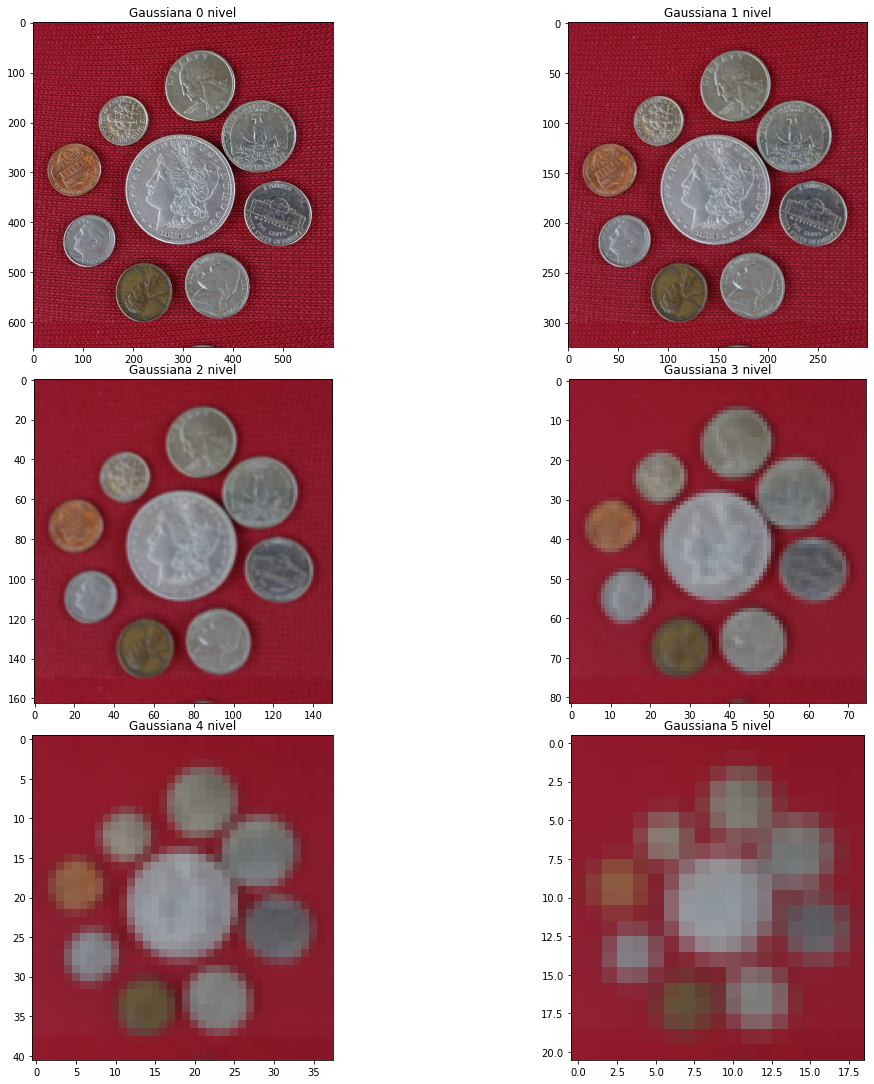

In [68]:
#Lemos a imaxe
A = cv2.imread('../data/CoinsA.png')
if A is None:
    raise Exception("Non atopo a imaxe no sitio indicado")
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

#Xeramos a pirámide gaussiana
gpA = gen_gaussian_pyramid(A,levels=5)

#Visualizacion (OLLO: esta feita ad-hod para o numero de niveis seleccionados 5.)
#Se cambias os niveis la Laplaciana tes que modificar os indices dos for para unha
#correcta visualización e non desbordar as dimensións dos arrays
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.tight_layout()
num_levels = 0
for i in range(3):   #filas do plot
    for j in range(2):  #columnas do plot  
        axs[i,j].imshow(gpA[num_levels]);
        axs[i,j].title.set_text("Gaussiana {} nivel".format(num_levels));
        num_levels+=1

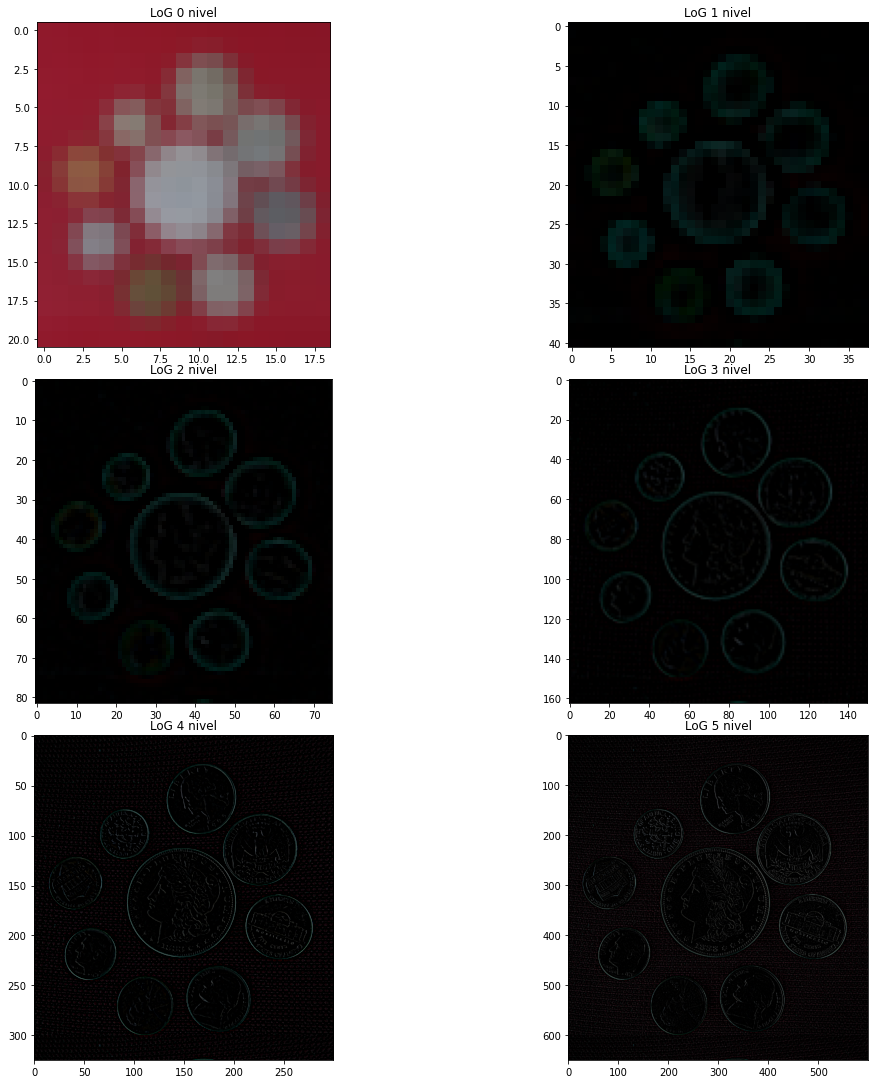

In [69]:

#Xeramos a pirámide LoG de A
lpA = gen_laplacian_pyramid(gpA)

#Imprimimos dimensións dos niveis da LoG
#num_levels = len(lpA)
#for i in range(num_levels):
#    rows = lpA[i].shape[0]
#    cols = lpA[i].shape[1]
#    print('Nivel={}: Tamaño={}x{}'.format(i, cols, rows))

#Visualizacion (OLLO: esta feita ad-hod para o numero de niveis seleccionados 5.)
#Se cambias os niveis la Laplaciana tes que modificar os indices dos for para unha
#correcta visualización e non desbordar as dimensións dos arrays
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.tight_layout()
num_levels = 0
for i in range(3):   #filas do plot
    for j in range(2):  #columnas do plot  
        axs[i,j].imshow(lpA[num_levels]);
        axs[i,j].title.set_text("LoG {} nivel".format(num_levels));
        num_levels+=1

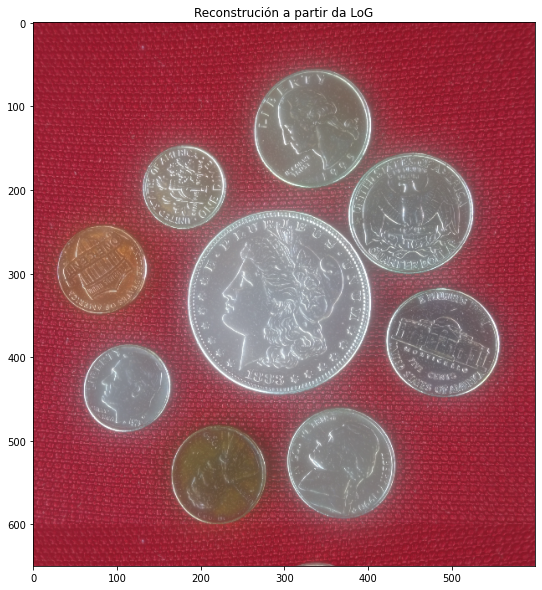

In [75]:
# Reconstrución a partir da piramide LoG
ls_ = lpA[0]
for i in range(1,len(lpA)):
    ls_ = cv2.pyrUp(ls_, dstsize=(lpA[i].shape[1], lpA[i].shape[0]))
    ls_ = cv2.add(ls_, lpA[i])
    
#Visualizamos a reconstruccion
plt.figure(figsize=(10,10))
plt.title('Reconstrución a partir da LoG')
plt.imshow(ls_)

## Recapitulación e conclusións

- Pirámide gaussiana

    1. Busqueda de estruturas dende escalas grandes a escalas pequenas
    2. Análise multi-escalas das imaxes (mantén isto en mente)
         
 - Pirámide de Laplacian
 
    1. Representación de imaxe máis decorrelada
    2. Pódese usar para a composición de imaxes (fotografía computacional), detección de blobs, bordes, ...
    
    
 - Submostraxe
    
    1. **Límite de Nyquist:** o límite de Nyquist dános o límite teórico da frecuencia mínima de mostraxe duhan sinal que cun ancho de banda máximo, $f_{max}$. Se que mostreamos por debaixo dese límite, producese distorsión e artefactos nos datos obtidos (aliasing).
    2. Necesidade de realizar unha suavizado paso-baixo antes de realizar a submostraxe

# 5. Exercicio
Completa o código na cela inferior.

In [ ]:
img = cv2.imread('./data/Sheet_Music_Test-1.jpg', cv2.IMREAD_GRAYSCALE)

# Executa 